<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

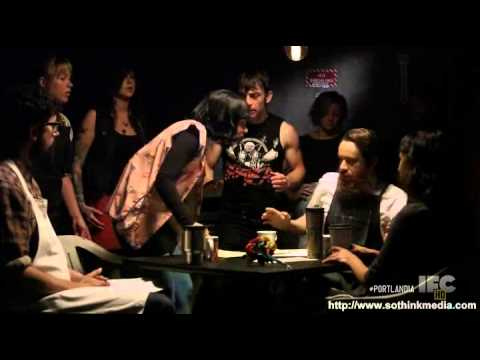

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [17]:
%pwd

'/Users/charliemay/Desktop/Lambda/DSPT7/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [2]:
# Start here 
from collections import Counter

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# NLP Libraries
import re
from nltk.stem import PorterStemmer
import spacy
from spacy.tokenizer import Tokenizer

In [41]:
#how many coffee shops are there?
shops['coffee_shop_name'].value_counts()

Epoch Coffee                            400
Halcyon                                 300
The Factory - Cafe With a Soul          244
Houndstooth Coffee                      200
Venezia Italian Gelato                  200
                                       ... 
Lucky Lab Coffee                         25
Sister Coffee                            17
Kowabunga Coffee                         16
The Marvelous Vintage Tea Party Co.      10
Lola Savannah Coffee Downtown             4
Name: coffee_shop_name, Length: 79, dtype: int64

In [42]:
# do ratings have decimals places other than 0?
shops['star_rating'].value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

In [43]:
# extract the rating
shops[['rating', 'rating_text']] = shops['star_rating'].str.split('.', 1, expand=True)
shops.head()

,coffee_shop_name,full_review_text,star_rating,rating,rating_text
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,5,0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,4,0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,4,0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2,0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,4,0 star rating


In [44]:
# drop columns I do not need
shops = shops.drop(['star_rating', 'rating_text'], axis=1)
shops.head()

,coffee_shop_name,full_review_text,rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4


In [49]:
# extract the date
shops[['blank_space', 'date', 'rating_text']] = shops['full_review_text'].str.split(' ', 2, expand=True)
shops.head()

,coffee_shop_name,full_review_text,rating,blank_space,date,rating_text
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5,,11/25/2016,1 check-in Love love loved the atmosphere! Eve...
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4,,12/2/2016,"Listed in Date Night: Austin, Ambiance in Aust..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4,,11/30/2016,1 check-in Listed in Brunch Spots I loved the ...
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2,,11/25/2016,Very cool decor! Good drinks Nice seating How...
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4,,12/3/2016,1 check-in They are located within the Northcr...


In [50]:
#drop columns I do not need
shops = shops.drop(['blank_space'], axis=1)
shops.head()

,coffee_shop_name,full_review_text,rating,date,rating_text
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5,11/25/2016,1 check-in Love love loved the atmosphere! Eve...
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4,12/2/2016,"Listed in Date Night: Austin, Ambiance in Aust..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4,11/30/2016,1 check-in Listed in Brunch Spots I loved the ...
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2,11/25/2016,Very cool decor! Good drinks Nice seating How...
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4,12/3/2016,1 check-in They are located within the Northcr...


In [53]:
# what does the df think date is?
shops['date'].describe()

/opt/anaconda3/envs/U4-S1-NLP/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


count                    7616
unique                   1592
top       2016-10-09 00:00:00
freq                       31
first     2006-11-11 00:00:00
last      2016-12-05 00:00:00
Name: date, dtype: object

In [52]:
# data["Date"]= pd.to_datetime(data["Date"])
shops['date'] = pd.to_datetime(shops['date'])
shops.head()

,coffee_shop_name,full_review_text,rating,date,rating_text
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5,2016-11-25,1 check-in Love love loved the atmosphere! Eve...
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4,2016-12-02,"Listed in Date Night: Austin, Ambiance in Aust..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4,2016-11-30,1 check-in Listed in Brunch Spots I loved the ...
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2,2016-11-25,Very cool decor! Good drinks Nice seating How...
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4,2016-12-03,1 check-in They are located within the Northcr...


In [3]:
def clean(x):
    # extract the rating
    x[['rating', 'rating_text']] = x['star_rating'].str.split('.', 1, expand=True)
    
    # extract the date
    x[['blank_space', 'date', 'rating_text']] = x['full_review_text'].str.split(' ', 2, expand=True)
    
    # make the date column datetime
    x['date'] = pd.to_datetime(x['date'])
    
    # drop columns I do not need
    x = x.drop(['star_rating', 'blank_space', 'full_review_text'], axis=1)
    
    # make rating numeric
    x['rating'] = x['rating'].apply(pd.to_numeric)
    
    return x

In [4]:
shops = clean(shops)

In [5]:
shops.head()

,coffee_shop_name,rating,rating_text,date
0,The Factory - Cafe With a Soul,5,1 check-in Love love loved the atmosphere! Eve...,2016-11-25
1,The Factory - Cafe With a Soul,4,"Listed in Date Night: Austin, Ambiance in Aust...",2016-12-02
2,The Factory - Cafe With a Soul,4,1 check-in Listed in Brunch Spots I loved the ...,2016-11-30
3,The Factory - Cafe With a Soul,2,Very cool decor! Good drinks Nice seating How...,2016-11-25
4,The Factory - Cafe With a Soul,4,1 check-in They are located within the Northcr...,2016-12-03


In [6]:
shops.dtypes

coffee_shop_name            object
rating                       int64
rating_text                 object
date                datetime64[ns]
dtype: object

In [64]:
# convert just columns "a" and "b"
shops['rating'] = shops['rating'].apply(pd.to_numeric)
shops.dtypes

coffee_shop_name            object
rating                       int64
rating_text                 object
date                datetime64[ns]
dtype: object

In [65]:
shops.head()

,coffee_shop_name,rating,rating_text,date
0,The Factory - Cafe With a Soul,5,1 check-in Love love loved the atmosphere! Eve...,2016-11-25
1,The Factory - Cafe With a Soul,4,"Listed in Date Night: Austin, Ambiance in Aust...",2016-12-02
2,The Factory - Cafe With a Soul,4,1 check-in Listed in Brunch Spots I loved the ...,2016-11-30
3,The Factory - Cafe With a Soul,2,Very cool decor! Good drinks Nice seating How...,2016-11-25
4,The Factory - Cafe With a Soul,4,1 check-in They are located within the Northcr...,2016-12-03


In [7]:
# Inialize spaCy model and tokenizer
nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

In [8]:
# I am going to tockenize using a token pipe
tokens = []
for doc in tokenizer.pipe(shops['rating_text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

shops['spacy_tokens'] = tokens
shops['spacy_tokens'].head()

0    [1, check-in, Love, love, loved, the, atmosphe...
1    [Listed, in, Date, Night:, Austin,, Ambiance, ...
2    [1, check-in, Listed, in, Brunch, Spots, I, lo...
3    [Very, cool, decor!, Good, drinks, Nice, seati...
4    [1, check-in, They, are, located, within, the,...
Name: spacy_tokens, dtype: object

In [9]:
def count(docs):
    '''This function takes a list of tokenized documents as input and returns
    a dataframe with frequency counts and rank for each token.
    
    # Arguments
        docs: list, tokenized list of documents
        
    # Returns
        wc: dataframe, 
    '''
    
    word_counts = Counter()
    appears_in = Counter() # appears in will only count occurances, not total count

    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc)) # set makes it occurances (oh many reviews contained a word)

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank') 

In [10]:
wc = count(shops['spacy_tokens'])
print(wc.shape)
wc.head()

(44566, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
69,the,6520,27779,1.0,0.034993,0.034993,0.856092
21,and,6804,25748,2.0,0.032434,0.067427,0.893382
42,a,6181,22085,3.0,0.027820,0.095247,0.811581
59,I,5469,19780,4.0,0.024916,0.120163,0.718093
1,to,5631,16904,5.0,0.021294,0.141457,0.739364


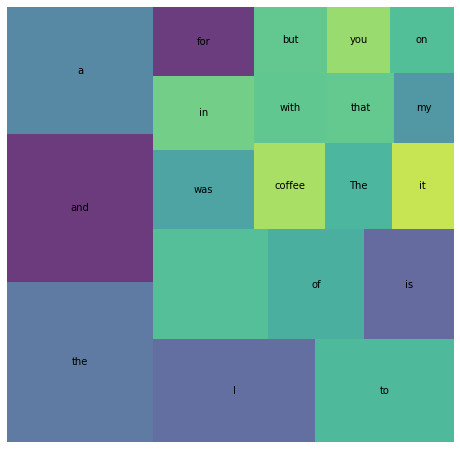

In [11]:
wc_top20 = wc[wc['rank'] <= 20]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [12]:
# Spacy's Default Stop Words
# Bruno claims this is not recommended at work
STOP_WORDS = nlp.Defaults.stop_words.union([' '])
STOP_WORDS

{' ',
 "'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',


In [13]:
tokens = []

# Return lower case tokens and ignore stop words/punctuation
for doc in tokenizer.pipe(shops['rating_text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
        if (token.text.lower() not in STOP_WORDS) & (token.is_punct == False) & (token.like_num == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

shops['spacy_tokens_v2'] = tokens
shops['spacy_tokens_v2'].head()

0    [check-in, love, love, loved, atmosphere!, cor...
1    [listed, date, night:, austin,, ambiance, aust...
2    [check-in, listed, brunch, spots, loved, eclec...
3    [cool, decor!, good, drinks, nice, seating, ho...
4    [check-in, located, northcross, mall, shopping...
Name: spacy_tokens_v2, dtype: object

In [14]:
# Use the Function
wc = count(shops['spacy_tokens_v2'])
print(wc.shape)
wc.head()

(38532, 7)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
32,coffee,4210,8058,1.0,0.020898,0.020898,0.552784
143,place,3029,4264,2.0,0.011059,0.031957,0.397715
126,great,2438,3250,3.0,0.008429,0.040385,0.320116
240,it's,2061,3117,4.0,0.008084,0.048469,0.270614
163,like,2034,2902,5.0,0.007526,0.055996,0.267069


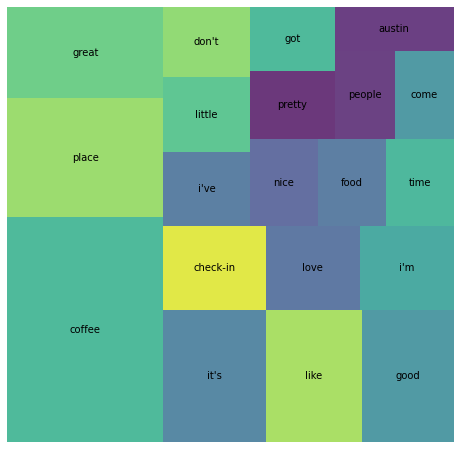

In [15]:
wc_top20 = wc[wc['rank'] <= 20]

plt.figure(figsize=(8,8))
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [16]:
shops.head()

,coffee_shop_name,rating,rating_text,date,spacy_tokens,spacy_tokens_v2
0,The Factory - Cafe With a Soul,5,1 check-in Love love loved the atmosphere! Eve...,2016-11-25,"[1, check-in, Love, love, loved, the, atmosphe...","[check-in, love, love, loved, atmosphere!, cor..."
1,The Factory - Cafe With a Soul,4,"Listed in Date Night: Austin, Ambiance in Aust...",2016-12-02,"[Listed, in, Date, Night:, Austin,, Ambiance, ...","[listed, date, night:, austin,, ambiance, aust..."
2,The Factory - Cafe With a Soul,4,1 check-in Listed in Brunch Spots I loved the ...,2016-11-30,"[1, check-in, Listed, in, Brunch, Spots, I, lo...","[check-in, listed, brunch, spots, loved, eclec..."
3,The Factory - Cafe With a Soul,2,Very cool decor! Good drinks Nice seating How...,2016-11-25,"[Very, cool, decor!, Good, drinks, Nice, seati...","[cool, decor!, good, drinks, nice, seating, ho..."
4,The Factory - Cafe With a Soul,4,1 check-in They are located within the Northcr...,2016-12-03,"[1, check-in, They, are, located, within, the,...","[check-in, located, northcross, mall, shopping..."


In [24]:
def is_good (x):
  if x['rating'] == 5:
    return 1
  else:
    return 0

shops['is_good'] = shops.apply(is_good, axis=1)
shops.head()

,coffee_shop_name,rating,rating_text,date,spacy_tokens,spacy_tokens_v2,is_good
0,The Factory - Cafe With a Soul,5,1 check-in Love love loved the atmosphere! Eve...,2016-11-25,"[1, check-in, Love, love, loved, the, atmosphe...","[check-in, love, love, loved, atmosphere!, cor...",1
1,The Factory - Cafe With a Soul,4,"Listed in Date Night: Austin, Ambiance in Aust...",2016-12-02,"[Listed, in, Date, Night:, Austin,, Ambiance, ...","[listed, date, night:, austin,, ambiance, aust...",0
2,The Factory - Cafe With a Soul,4,1 check-in Listed in Brunch Spots I loved the ...,2016-11-30,"[1, check-in, Listed, in, Brunch, Spots, I, lo...","[check-in, listed, brunch, spots, loved, eclec...",0
3,The Factory - Cafe With a Soul,2,Very cool decor! Good drinks Nice seating How...,2016-11-25,"[Very, cool, decor!, Good, drinks, Nice, seati...","[cool, decor!, good, drinks, nice, seating, ho...",0
4,The Factory - Cafe With a Soul,4,1 check-in They are located within the Northcr...,2016-12-03,"[1, check-in, They, are, located, within, the,...","[check-in, located, northcross, mall, shopping...",0


In [19]:
shops.head()

,coffee_shop_name,rating,rating_text,date,spacy_tokens,spacy_tokens_v2,is_good
0,The Factory - Cafe With a Soul,5,1 check-in Love love loved the atmosphere! Eve...,2016-11-25,"[1, check-in, Love, love, loved, the, atmosphe...","[check-in, love, love, loved, atmosphere!, cor...",1
1,The Factory - Cafe With a Soul,4,"Listed in Date Night: Austin, Ambiance in Aust...",2016-12-02,"[Listed, in, Date, Night:, Austin,, Ambiance, ...","[listed, date, night:, austin,, ambiance, aust...",1
2,The Factory - Cafe With a Soul,4,1 check-in Listed in Brunch Spots I loved the ...,2016-11-30,"[1, check-in, Listed, in, Brunch, Spots, I, lo...","[check-in, listed, brunch, spots, loved, eclec...",1
3,The Factory - Cafe With a Soul,2,Very cool decor! Good drinks Nice seating How...,2016-11-25,"[Very, cool, decor!, Good, drinks, Nice, seati...","[cool, decor!, good, drinks, nice, seating, ho...",0
4,The Factory - Cafe With a Soul,4,1 check-in They are located within the Northcr...,2016-12-03,"[1, check-in, They, are, located, within, the,...","[check-in, located, northcross, mall, shopping...",1


In [26]:
shops.is_good.value_counts()

0    3836
1    3780
Name: is_good, dtype: int64

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

